사전준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

import matplotlib as mpl
import seaborn as sns

from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='D2Coding')
sns.set(font='D2Coding', rc={'axes.unicode_minus':False}, style='darkgrid')

import statsmodels.api as sm #안쓸지도
import sklearn as sk

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = load_data()

In [4]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
def show_images(dataset, label, nrow, ncol):
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*2, nrow*2))
    ax = axes.ravel()

    xlabels = label[:nrow*ncol] # [0:nrow*ncol] 과 같겠지?

    for i in range(nrow*ncol):
        ax[i].imshow(dataset[i], cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])

    plt.tight_layout()
    plt.show()

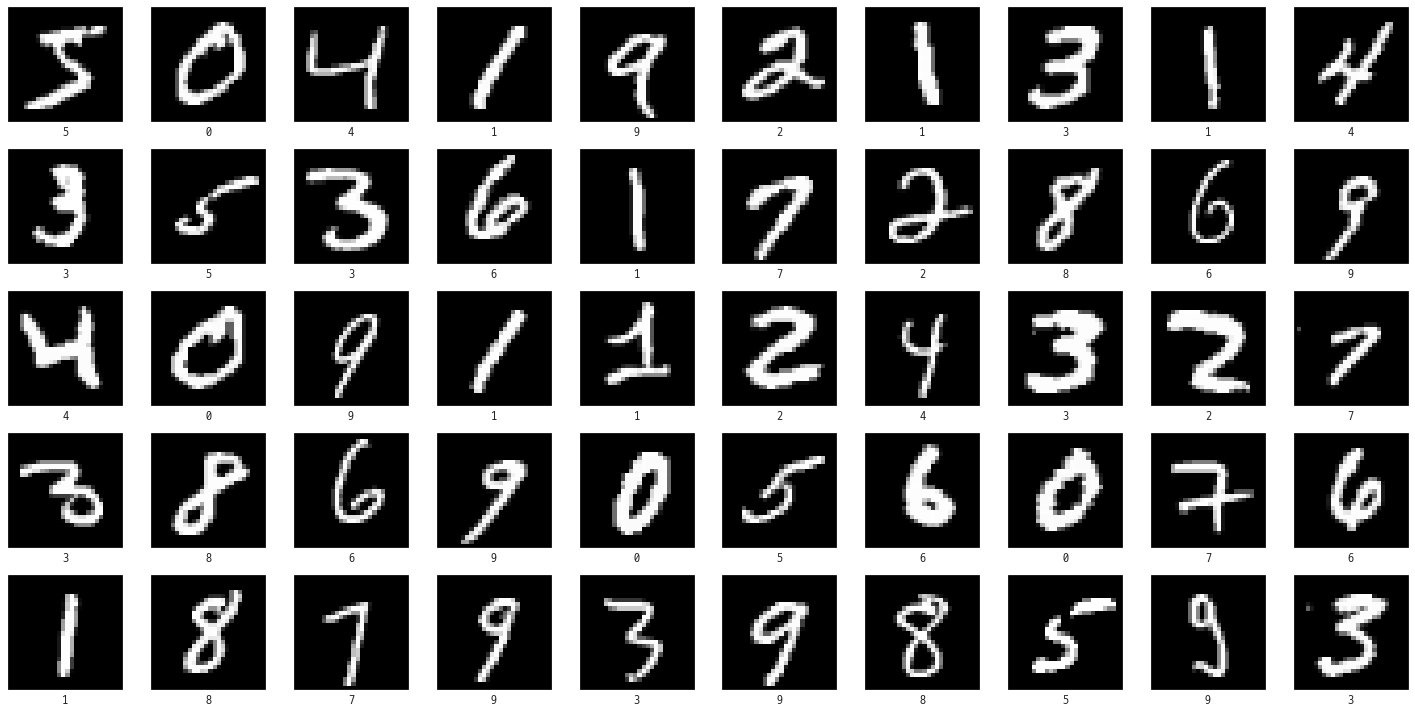

In [6]:
show_images(train_input, train_target, 5, 10)

In [8]:
model = keras.Sequential(name = 'CNN')

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1000, activation='relu', name='hidden'))
model.add(keras.layers.Dense(0.3))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))
model.summary()


Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0       

In [9]:
# 이번엔 그 255로 나누기가 없지?
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model2.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, validation_data=(test_input, test_target), batch_size=100,
callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
600/600 [==============================] - ETA: 0s - loss: 1.8575 - accuracy: 0.8324
Epoch 1: val_loss improved from inf to 0.36257, saving model to best_cnn_model2.h5
600/600 [==============================] - 55s 90ms/step - loss: 1.8575 - accuracy: 0.8324 - val_loss: 0.3626 - val_accuracy: 0.8654
Epoch 2/20
600/600 [==============================] - ETA: 0s - loss: 0.2979 - accuracy: 0.8892
Epoch 2: val_loss improved from 0.36257 to 0.33314, saving model to best_cnn_model2.h5
600/600 [==============================] - 54s 90ms/step - loss: 0.2979 - accuracy: 0.8892 - val_loss: 0.3331 - val_accuracy: 0.8760
Epoch 3/20
600/600 [==============================] - ETA: 0s - loss: 0.2486 - accuracy: 0.9067
Epoch 3: val_loss improved from 0.33314 to 0.32175, saving model to best_cnn_model2.h5
600/600 [==============================] - 56s 93ms/step - loss: 0.2486 - accuracy: 0.9067 - val_loss: 0.3218 - val_accuracy: 0.8889
Epoch 4/20
600/600 [==============================] - ET

NameError: name 'samples' is not defined

<Figure size 1008x864 with 0 Axes>